# Visualisasi
Hari ini kita akan pelajari 2 teknik visualisasi berbeda
- Word Cloud
- Choropleth (Map)

## Word Cloud
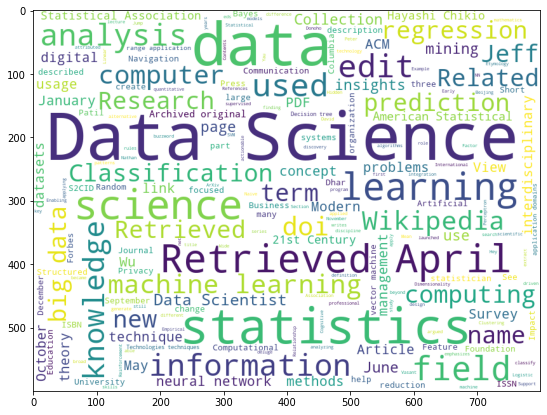

Word cloud merangkum data text secara visual

data numerik tabular seperti yang di sesi sebelum juga bisa kita konversi menjadi data text, baru dibuat jadi word cloud.

Untuk contoh hari ini kita akan coba buat 2 jenis word cloud
- dari data text
- dari data numerik tabular seperti data imigrasi kemarin

## Wordcloud dari Text File
kita akan gunakan contoh text file cerita Cinderella dari https://raw.githubusercontent.com/stefkwan-h8/dataset/main/Cinderella.txt

Kita akan gunakan package wordcloud milik amueller dari https://pypi.org/project/wordcloud/ atau https://amueller.github.io/word_cloud/

1. siapkan package wordcloud (install kalau belum, lalu import package)
2. siapkan data (download data untuk di import)
3. buat wordcloud

note: untuk download data, bisa secara manual atau menggunakan code dengan package wget https://pypi.org/project/wget/

In [ ]:
pip install wordcloud

In [ ]:
pip install wget

  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=aa1eecebac81990046aadc99d05acad6938b7d6e1f76c3f249085716c3578124
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [ ]:
# buat wordcloud
from wordcloud import WordCloud, STOPWORDS

# download file
import wget

# menampilkan wordcloud secara visual
import matplotlib.pyplot as plt

# pandas untuk manipulasi data tabular seperti csv dan excel
import pandas as pd
import numpy as np

# buka file gambar
from PIL import Image

In [ ]:
# download file data dulu
!wget https://raw.githubusercontent.com/stefkwan-h8/dataset/main/Cinderella.txt

--2023-10-18 12:21:11--  https://raw.githubusercontent.com/stefkwan-h8/dataset/main/Cinderella.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10172 (9.9K) [text/plain]
Saving to: ‘Cinderella.txt’

Cinderella.txt      100%[===================>]   9.93K  --.-KB/s    in 0.001s  

2023-10-18 12:21:11 (16.2 MB/s) - ‘Cinderella.txt’ saved [10172/10172]



In [ ]:
text_cin = open("Cinderella.txt", 'r').read()
print(text_cin)

CINDERELLA
The wife of a rich man fell sick: and when she felt that her end drew nigh, she called her only daughter to her bedside, and said, "Always be a good girl, and I will look down from heaven and watch over you." Soon afterwards she shut her eyes and died, and was buried in the garden; and the little girl went every day to her grave and wept, and was always good and kind to all about her. And the snow spread a beautiful white covering over the grave; but by the time the sun had melted it away again, her father had married another wife. This new wife had two daughters of her own: they were fair in face but foul at heart, and it was now a sorry time for the poor little girl. "What does the good-for-nothing thing want in the parlor?" said they; and they took away her fine clothes, and gave her an old frock to put on, and laughed at her and turned her into the kitchen.

Then she was forced to do hard work; to rise early, before daylight, to bring the water, to make the fire, to cook

In [ ]:
# buat wordcloud
wc_cin = WordCloud()
wc_cin.generate(text_cin)

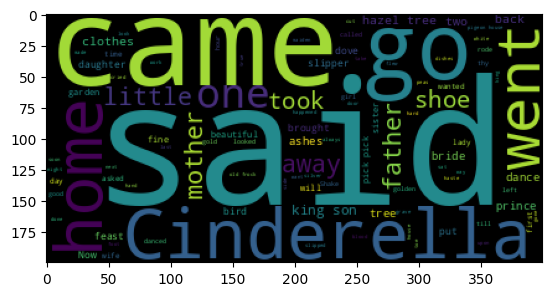

In [ ]:
# tampilkan wordcloud secara visual
plt.imshow(wc_cin)

ada beberapa hal yang bisa kita improve dari wordcloud diatas:
- background ganti putih (biar cakep)
- axis tidak perlu (tidak berguna untuk wordcloud)
- kata kata filler, conjuction, yang bukan keyword dan tidak memberi konteks cerita mau kita hapus. kata kata ini namanya "stopwords".

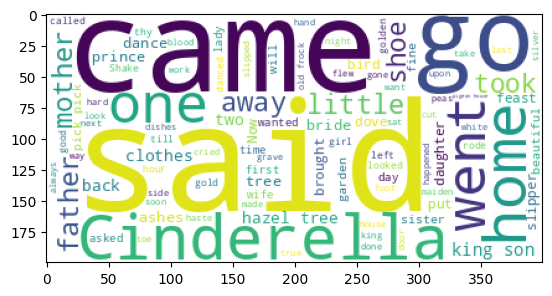

In [ ]:
# tambahin opsi untuk ganti background
wc = WordCloud(background_color="white")
wc.generate(text_cin)

# tampilkan secara visual
plt.imshow(wc)
plt.show()

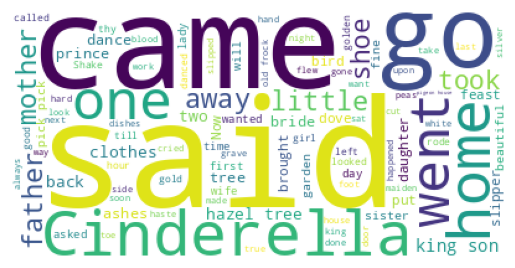

In [ ]:
# tidak mau ada axis
plt.axis('off')
plt.imshow(wc)
plt.show()

In [ ]:
# kurangi kata-kata tidak penting, stopwords nya
# import dulu STOPWORDS dari package wordcloud
# custom STOPWORDS
sw = STOPWORDS.copy()
sw.add("said")

hapus_juga = {"came", "and", "or", "why"}
sw.update(hapus_juga)

print(sw)

{'during', 'most', "i'll", 'to', 'above', "we'll", "she'd", "where's", "shouldn't", 'so', "wouldn't", 'itself', 'hence', "we've", "i've", 'out', 'would', 'be', 'does', "don't", "they've", 'some', 'from', 'being', 'cannot', 'into', 'that', 'can', 'no', 'ours', 'in', "i'm", 'said', "she's", 'below', 'they', 'any', 'over', 'them', 'therefore', 'those', 'own', 'ever', 'were', 'herself', "mustn't", 'its', "she'll", 'when', 'him', "here's", 'just', 'all', 'she', 'further', 'very', 'has', 'such', 'for', 'about', 'since', 'yourselves', "didn't", 'other', "we're", 'having', 'few', 'nor', 'or', 'once', 'like', 'too', 'while', 'did', 'me', "that's", 'as', 'off', 'what', 'than', 'these', "aren't", "wasn't", 'your', 'same', "it's", "you've", 'where', 'how', 'we', "let's", "you'll", 'k', 'am', 'at', "he'd", 'down', 'her', 'a', 'ourselves', "we'd", 'have', 'he', 'between', "there's", 'under', "hasn't", 'this', 'only', 'however', 'themselves', "they're", "why's", 'com', "shan't", "they'd", 'myself', '

note: untuk bahasa Indonesia, atau bahasa lainnya, kita bisa cari list stopwords yang sudah dibuat orang lain contoh https://github.com/masdevid/ID-Stopwords/blob/master/id.stopwords.02.01.2016.txt atau kita bisa bikin list/set sendiri

In [ ]:
"came" in sw

True

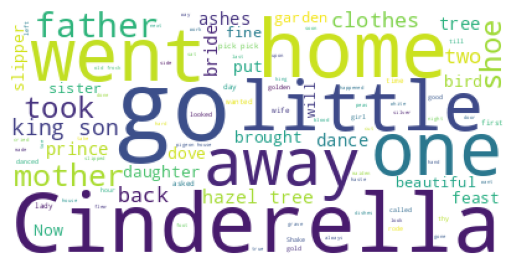

In [ ]:
# update wordcloud kita dengan stopwords
wc = WordCloud(background_color="white",
               stopwords=sw)
wc.generate(text_cin)

plt.axis('off')
plt.imshow(wc)
plt.show()

## latihan pendek
cobalah membuat wordcloud menggunakan data text seperti novel, data novel yang copyright free bisa dilihat di https://www.gutenberg.org/ (aku rekomen untuk copy paste ke file txt novel yang diinginkan, lalu uploade ke github.com untuk dapat link raw file nya. kalau nggak, bisa juga di run lokal menggunakan file txt nya)

1. download dulu file dengan wget
2. download dan import package wordcloud
3. buat wordcloud
4. percantik wordcloud

## Membuat wordcloud dari data tabular
contohnya data imigrasi ke Canada kemarin https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true

kita bisa buat wordcloud yang menunjukkan jumlah imigran yang ke Canada dari negara mana paling banyak


In [ ]:
!wget https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true -O "Canada.xlsx"

--2023-10-18 13:01:30--  https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/ardhiraka/PFDS_sources/raw/master/Canada.xlsx [following]
--2023-10-18 13:01:31--  https://github.com/ardhiraka/PFDS_sources/raw/master/Canada.xlsx
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Canada.xlsx [following]
--2023-10-18 13:01:31--  https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Canada.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting re

In [ ]:
df_can = pd.read_excel("Canada.xlsx",
                       sheet_name="Canada by Citizenship",
                       skiprows=20,
                       skipfooter=2
                       )
df_can = df_can.rename(columns={"OdName": "Country", "AreaName":"Continent", "RegName":"Region"})
df_can = df_can.drop(columns=["Type", "Coverage", "AREA" , "REG", "DEV", "DevName"])
df_can = df_can.drop(columns=["Continent", "Region"]) # optional
df_can = df_can.set_index("Country")

years = range(1980,2014)
df_can.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,16,39,39,47,71,340,496,741,828,1076,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,1,0,0,0,0,0,1,2,2,3,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,80,67,71,69,63,44,69,132,242,434,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,0,1,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0
Andorra,0,0,0,0,0,0,2,0,0,0,...,0,0,1,1,0,0,0,0,1,1


konversi dari jumlah imigran menjadi nama negara tersebut * jumlah imigran

hitung total imigran per negara dulu

In [ ]:
df_can2 = df_can.copy()
df_can2["Total"] = df_can.sum(axis=1)

# drop kolom lainnya
df_can2 = df_can2["Total"]

df_can2

Country
Afghanistan       58639
Albania           15699
Algeria           69439
American Samoa        6
Andorra              15
                  ...  
Viet Nam          97146
Western Sahara        2
Yemen              2985
Zambia             1677
Zimbabwe           8598
Name: Total, Length: 195, dtype: int64

masalahnya, kalau kita convert 1 to 1, setiap 1 imigran nama negara muncul 1 kali, kita akan membuat sebuah text file yang sangat besar


In [ ]:
df_can2.sum()

6409153

jadi biasanya daripada kiat buat 6.4jt nama negara jadi text semua, kita mau hitung proporsi nya saja.

misal kita mau buat 1000 text aja. maka kita konversi per 1000 imigran nama negara tersebut muncul 1 kali.

In [ ]:
# initial text canada kosong
text_can = ""
max_words = 1000 # 1k kata saja
total_immigration = df_can2.sum()

for country in df_can2.index.values:
  # print(country, df_can2[country])
  jumlah_imigran = df_can2[country]

  nama_negara = country
  hapus_karakter = " ()',-:1234567890"
  for k in hapus_karakter:
    nama_negara = nama_negara.replace(k,"")

  proporsi = int(jumlah_imigran/total_immigration * max_words)
  text_can = text_can + (" " + nama_negara) * proporsi

print(len(text_can))
print(text_can)

12208
 Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Albania Albania Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Algeria Argentina Argentina Argentina Australia Australia Australia Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Bangladesh Barbados Belarus Belgium BosniaandHerzegovina BosniaandHerzegovina BosniaandHerzegovina Brazil Brazil Brazil Brazil Bulgaria Bulgaria Bulgaria Burundi Cambodia Cameroon Cameroon Chile Chile Chile China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China China Chi

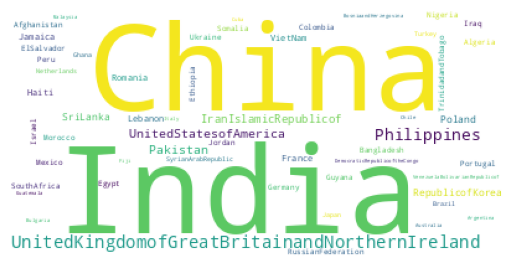

In [ ]:
wc_can = WordCloud(
    background_color="white",
    collocations=False
)

wc_can.generate(text_can)

plt.imshow(wc_can)
plt.axis("off")
plt.show()

terakhir kita bisa coba pakai file mask untuk membuat wordcloud dengan bentuk lainnya

contohnya file mask: https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png



1.   download file mask
2.   gunakan package Image untuk bisa buka file mask tadi
3.   gunakan numpy untuk convert Image jadi numpy array
4.   gunakan di wordcloud



In [ ]:
!wget https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png -O "alice.png"

--2023-10-18 13:22:48--  https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_mask.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7339 (7.2K) [image/png]
Saving to: ‘alice.png’

alice.png           100%[===================>]   7.17K  --.-KB/s    in 0s      

2023-10-18 13:22:48 (52.9 MB/s) - ‘alice.png’ saved [7339/7339]



In [ ]:
gambar_alice = Image.open("alice.png")
arr_alice = np.array(gambar_alice)
print(arr_alice[:10])

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [ ]:
# initial text canada kosong
text_can = ""
max_words = 10000 # 10k kata saja
total_immigration = df_can2.sum()

for country in df_can2.index.values:
  # print(country, df_can2[country])
  jumlah_imigran = df_can2[country]

  nama_negara = country
  hapus_karakter = " ()',-:1234567890"
  for k in hapus_karakter:
    nama_negara = nama_negara.replace(k,"")

  proporsi = int(jumlah_imigran/total_immigration * max_words)
  text_can = text_can + (" " + nama_negara) * proporsi

print(len(text_can))
print(text_can)

128656
 Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanistan Afghanis

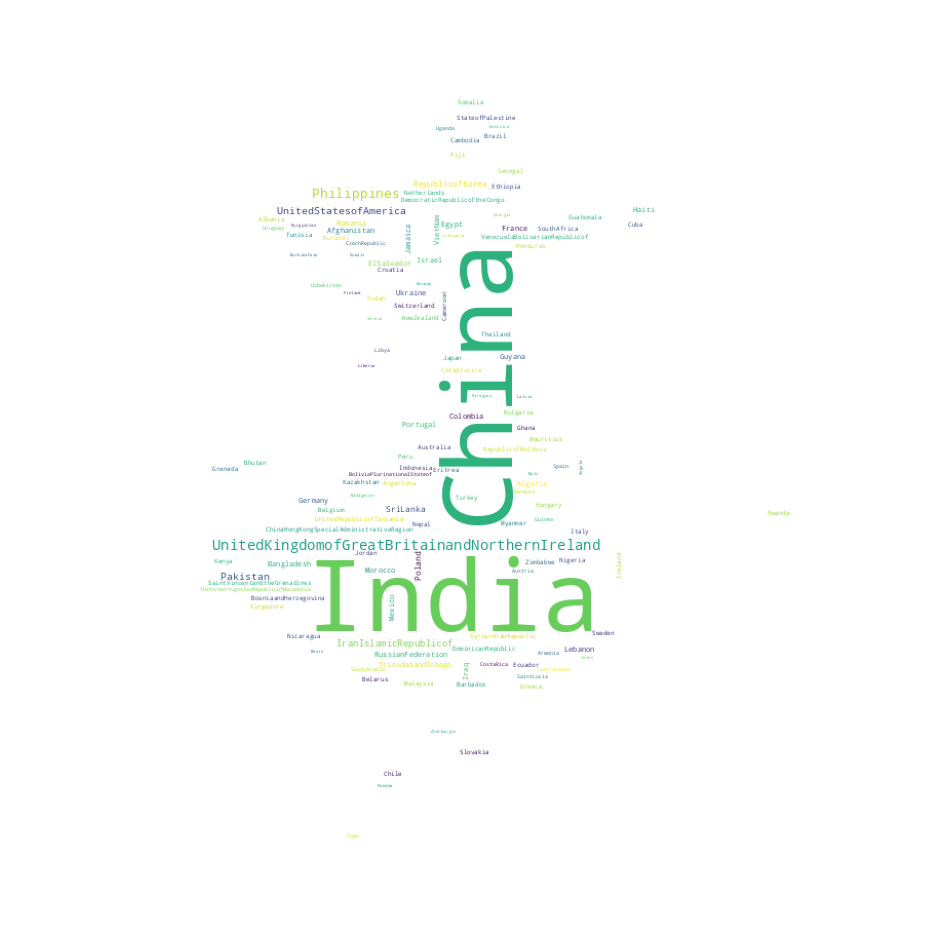

In [ ]:
wc_can = WordCloud(
    background_color="white",
    collocations=False,
    mask=arr_alice
)

wc_can.generate(text_can)

fig = plt.figure()
fig.set_figwidth(12)
fig.set_figheight(12)

plt.imshow(wc_can)
plt.axis("off")
plt.show()